In [1]:
%matplotlib inline

In [2]:
import pyfits
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

ここでFITSファイルを読み込みます。  
imcmはIRAFのimcombine、m5はMADの5-sigma clip、m10はMADの10-sigma clip

In [3]:
hdulist1 = pyfits.open('hOFF1imcm.fits')
data1 = hdulist1[0].data
hdulist2 = pyfits.open('hOFF1m5.fits')    
data2 = hdulist2[0].data
hdulist3 = pyfits.open('hOFF1m10.fits')    
data3 = hdulist3[0].data

関数を定義しておく

In [4]:
def getbackground(data, lthresh = -500, hthresh = 20000, niter = 3):
    # getbackground() in irsf.py 
    
    xx = np.where((data > lthresh) & (data < hthresh))
    med = np.median(data[xx])
    mad = np.median(np.absolute(data[xx] - med))

    for i in range(niter):
        xxc = np.where(abs(data - med) <= 3 * 1.5 * mad) 
        med = np.median(data[xxc])
        mad = np.median(np.absolute(data[xxc] - med))

    mdev = 1.5 * mad

    return med, mdev

In [5]:
med1, mdev1 = getbackground(data1)
med2, mdev2 = getbackground(data2)
med3, mdev3 = getbackground(data3)

numpy ndarrayでは二次元配列が [y, x] 

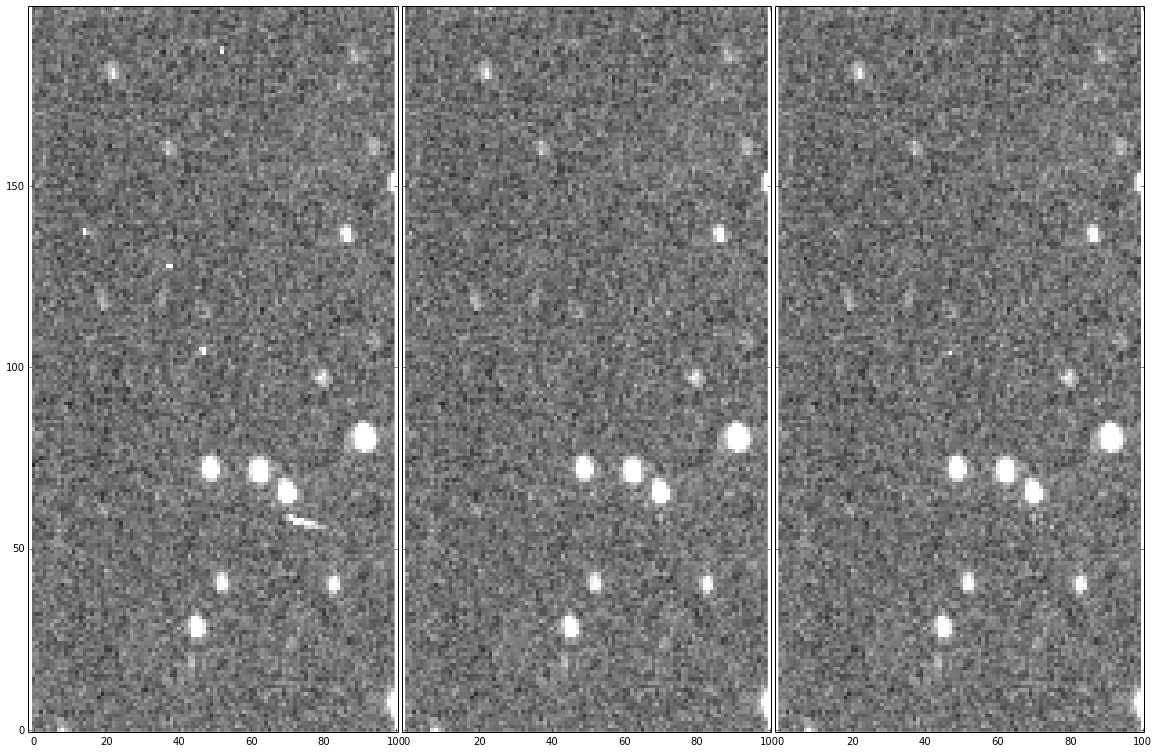

In [6]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3,  sharey=True, figsize=(20, 13), facecolor='white')
f.subplots_adjust(wspace=0.01)

ax1.imshow(data1[400:600, 820:920], plt.cm.gray, vmin=med1-5*mdev1, 
                   vmax=med1+6*mdev1, origin='lower', interpolation='none')

ax2.imshow(data2[400:600, 820:920], plt.cm.gray, vmin=med2-5*mdev2, 
                   vmax=med2+6*mdev2, origin='lower', interpolation='none')

ax3.imshow(data3[400:600, 820:920], plt.cm.gray, vmin=med3-5*mdev3, 
                   vmax=med3+6*mdev3, origin='lower', interpolation='none')


plt.show()

重ね合わせに使った枚数のデータは拡張FITSの2番目に入っている

In [7]:
dataN1 = hdulist1[1].data
dataN2 = hdulist2[1].data
dataN3 = hdulist3[1].data

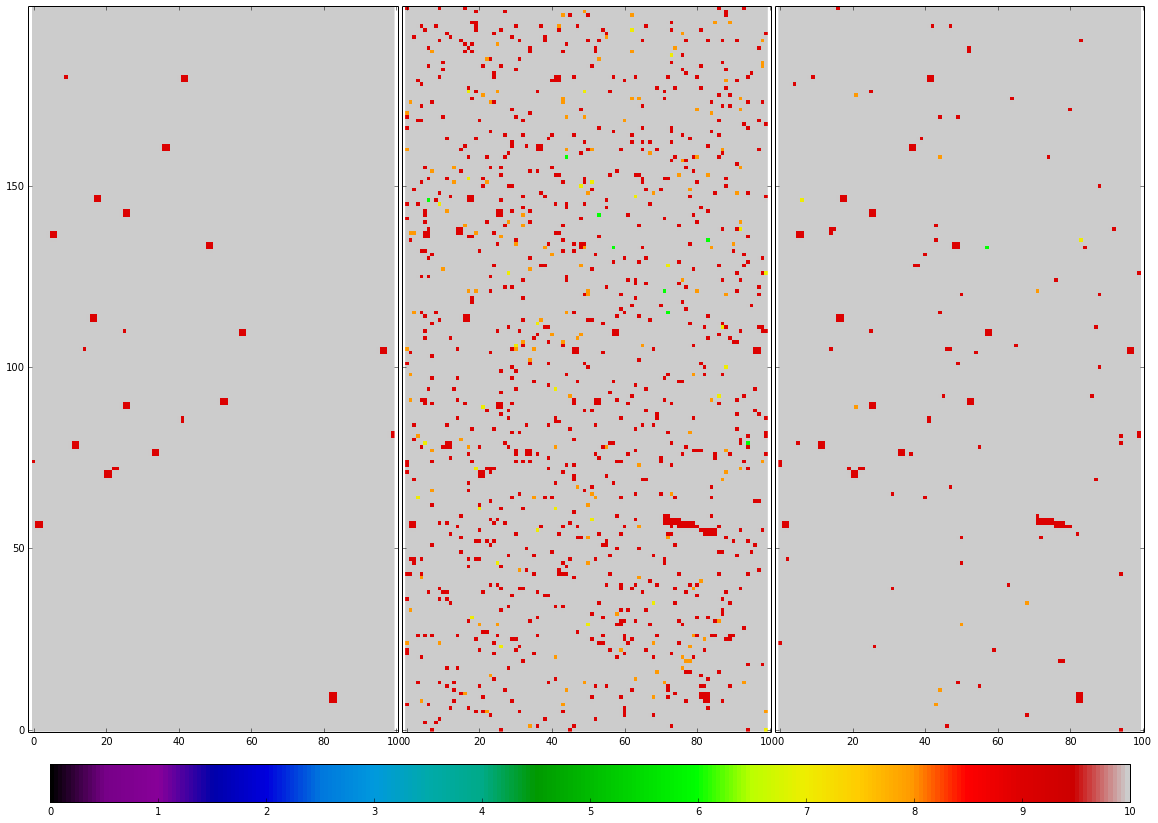

In [8]:
norm = mpl.colors.Normalize(vmin=0, vmax=10)

f, (ax1, ax2, ax3) = plt.subplots(1, 3,  sharey=True, figsize=(20, 13), facecolor='white')
f.subplots_adjust(wspace=0.01)

ax1.imshow(dataN1[400:600, 820:920], plt.cm.nipy_spectral, vmin=0,  vmax=10, 
               origin='lower', interpolation='none')

ax2.imshow(dataN2[400:600, 820:920], plt.cm.nipy_spectral, vmin=0, vmax=10, 
               origin='lower', interpolation='none')

ax3.imshow(dataN3[400:600, 820:920], plt.cm.nipy_spectral, vmin=0, vmax=10, 
               origin='lower', interpolation='none')

ax4 = f.add_axes([0.14, 0.05, 0.75, 0.04])  
cb1 = mpl.colorbar.ColorbarBase(ax4, cmap=plt.cm.nipy_spectral, norm=norm, 
                                orientation='horizontal', ticks=[0,1,2,3,4,5,6,7,8,9,10])
plt.show()

In [9]:
hdulist1[0].header['COMAREA']

'[66:1024,67:1024]'

'COMAREA'にて、値が10, 9, 8 のピクセルがそれぞれ何個あるか

In [10]:
num10_1 = len(np.where(dataN1[67:1024,66:1024] == 10)[0])
num9_1 = len(np.where(dataN1[67:1024,66:1024] == 9)[0])
num8_1 = len(np.where(dataN1[67:1024,66:1024] == 8)[0])

In [11]:
print num8_1, num9_1, num10_1

281 19157 897351


In [12]:
num10_2 = len(np.where(dataN2[67:1024,66:1024] == 10)[0])
num9_2 = len(np.where(dataN2[67:1024,66:1024] == 9)[0])
num8_2 = len(np.where(dataN2[67:1024,66:1024] == 8)[0])

In [13]:
print num8_2, num9_2, num10_2

8582 53373 852495


In [14]:
num10_3 = len(np.where(dataN3[67:1024,66:1024] == 10)[0])
num9_3 = len(np.where(dataN3[67:1024,66:1024] == 9)[0])
num8_3 = len(np.where(dataN3[67:1024,66:1024] == 8)[0])

In [15]:
print num8_3, num9_3, num10_3

738 21721 894241


In [16]:
num10_3 = len(np.where(dataN3[67:1024,66:1024] == 10)[0])

In [17]:
(897351. - 852495) / 897351

0.04998712878238281

In [18]:
(897351 - 894241) / 897351. 

0.0034657564319870372

flatten()で2次元配列を1次元化してやるとヒストグラム作成が楽

In [19]:
fdataN1 = dataN1[67:1024,66:1024].flatten()
fdataN2 = dataN2[67:1024,66:1024].flatten()
fdataN3 = dataN3[67:1024,66:1024].flatten()

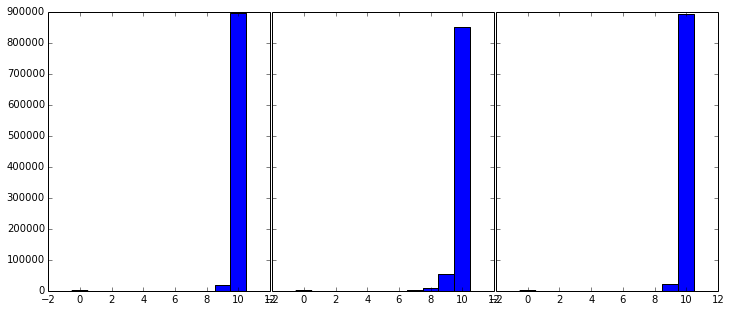

In [20]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3,  sharex=True, sharey=True, figsize=(12, 5), facecolor='white')
f.subplots_adjust(wspace=0.01)
ax1.hist(fdataN1, bins=11, range=(-0.5, 10.5))
ax2.hist(fdataN2, bins=11, range=(-0.5, 10.5))
ax3.hist(fdataN3, bins=11, range=(-0.5, 10.5))
plt.show()